<a href="https://colab.research.google.com/github/Siddhant254/Deep-Learning-Concepts/blob/master/Vanishing_Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
# DATA
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=250,noise=0.05,random_state=42)

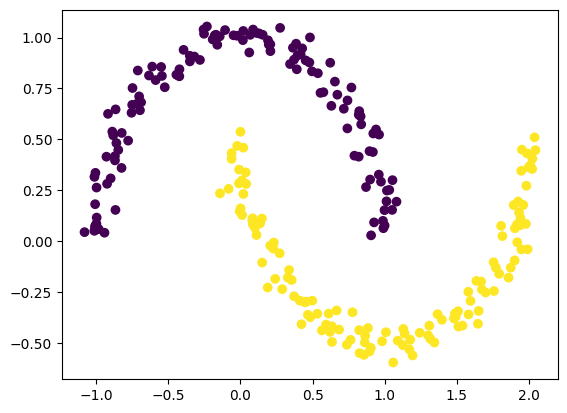

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
from keras.layers import Dense
from keras.models import Sequential

In [5]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
# Weight of first layer
old_weights = model.get_weights()[0]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 9ms/step - loss: 0.6949 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.4900
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.4900
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6937 - accuracy: 0.4700
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

In [10]:
new_weights = model.get_weights()[0]

In [11]:
# Learning rate
model.optimizer.get_config()['learning_rate']

0.001

In [12]:
gradient = (old_weights - new_weights)/0.001
percent_change = abs(100*(old_weights - new_weights)/old_weights)

In [13]:
gradient

array([[ 0.22113322, -5.355179  , -6.9006977 , -6.013423  ,  8.035704  ,
         0.68399304,  8.173286  , -2.8395762 ,  1.134336  , -6.441831  ],
       [-0.2558455 ,  4.550576  ,  5.669951  ,  4.874259  , -5.988061  ,
        -0.8371472 , -6.4316387 ,  2.1746159 , -1.1711493 ,  5.658805  ]],
      dtype=float32)

In [14]:
percent_change

array([[ 0.04314707,  0.8862232 ,  3.4042222 ,  2.5829456 ,  6.128045  ,
         0.15968654,  3.7346716 , 10.160011  ,  0.18395944,  1.2549815 ],
       [ 0.30156317,  0.79535806,  2.7619226 ,  2.5282125 ,  0.9538074 ,
         0.4091982 ,  1.005233  ,  0.6407958 ,  1.7858474 ,  1.3525316 ]],
      dtype=float32)